In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import json

In [62]:
mask = np.load('../test/2019/Input/static_grid/mask.npy').astype(bool)
lons = np.load('../test/2019/Input/static_grid/lons.npy')
lats = np.load('../test/2019/Input/static_grid/lats.npy')
days = np.arange(151, 244)
satellites = np.array(['aqua', 'terra', 'seawifs'])
years = np.array(['2003', '2004', '2005', '2006'])

In [82]:
def get_min(tensor):
    return tensor[~np.isnan(tensor)].min()

def get_max(tensor):
    return tensor[~np.isnan(tensor)].max()

def get_mean(tensor):
    return tensor[~np.isnan(tensor)].mean()

def get_std(tensor):
    return tensor[~np.isnan(tensor)].std()

def factor_rec_year_tensor(year_tensor_info):
    year_tensor, timeline = year_tensor_info['data'], year_tensor_info['timeline'][0]
    factored_tensor = []
    for day in days:
        try:
            day_ind = np.where(timeline == day)[0][0]
            day_matrix = year_tensor[:, :, day_ind]
        except IndexError:
            day_matrix = np.full_like(mask, fill_value=np.nan)
            
        factored_tensor.append(day_matrix[mask])
        
    factored_tensor = np.array(factored_tensor).flatten()
    return factored_tensor

def factor_rec_tensor(sat_tensor):
    return np.array([factor_rec_year_tensor(year_info) 
                     for year_info in sat_tensor]).flatten()

def form_tensor(base_matrix, dim_size):
    tensor = [base_matrix]

In [ ]:
rec_sat_ts = {
    'aqua': {
        '2003': {
            'data': np.load('Output/aqua/2003.npy'),
            'timeline': np.load('Input/aqua/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Output/aqua/2004.npy'),
            'timeline': np.load('Input/aqua/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Output/aqua/2005.npy'),
            'timeline': np.load('Input/aqua/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Output/aqua/2006.npy'),
            'timeline': np.load('Input/aqua/2006_timeline.npy')
        }
    },
    'terra': {
        '2003': {
            'data': np.load('Output/terra/2003.npy'),
            'timeline': np.load('Input/terra/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Output/terra/2004.npy'),
            'timeline': np.load('Input/terra/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Output/terra/2005.npy'),
            'timeline': np.load('Input/terra/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Output/terra/2006.npy'),
            'timeline': np.load('Input/terra/2006_timeline.npy')
        }
    },
    'seawifs': {
        '2003': {
            'data': np.load('Output/seawifs/2003.npy'),
            'timeline': np.load('Input/seawifs/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Output/seawifs/2004.npy'),
            'timeline': np.load('Input/seawifs/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Output/seawifs/2005.npy'),
            'timeline': np.load('Input/seawifs/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Output/seawifs/2006.npy'),
            'timeline': np.load('Input/seawifs/2006_timeline.npy')
        }
    }
}

gap_sat_ts = {
    'aqua': {
        '2003': {
            'data': np.load('Input/aqua/2003.npy'),
            'timeline': np.load('Input/aqua/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Input/aqua/2004.npy'),
            'timeline': np.load('Input/aqua/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Input/aqua/2005.npy'),
            'timeline': np.load('Input/aqua/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Input/aqua/2006.npy'),
            'timeline': np.load('Input/aqua/2006_timeline.npy')
        }
    },
    'terra': {
        '2003': {
            'data': np.load('Input/terra/2003.npy'),
            'timeline': np.load('Input/terra/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Input/terra/2004.npy'),
            'timeline': np.load('Input/terra/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Input/terra/2005.npy'),
            'timeline': np.load('Input/terra/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Input/terra/2006.npy'),
            'timeline': np.load('Input/terra/2006_timeline.npy')
        }
    },
    'seawifs': {
        '2003': {
            'data': np.load('Input/seawifs/2003.npy'),
            'timeline': np.load('Input/seawifs/2003_timeline.npy')
        },
        '2004': {
            'data': np.load('Input/seawifs/2004.npy'),
            'timeline': np.load('Input/seawifs/2004_timeline.npy')
        },
        '2005': {
            'data': np.load('Input/seawifs/2005.npy'),
            'timeline': np.load('Input/seawifs/2005_timeline.npy')
        },
        '2006': {
            'data': np.load('Input/seawifs/2006.npy'),
            'timeline': np.load('Input/seawifs/2006_timeline.npy')
        }
    }
}

In [12]:
rec_sat_means = pd.DataFrame({
    'aqua': {
        '2003': get_mean(rec_sat_ts['aqua']['2003']['data']),
        '2004': get_mean(rec_sat_ts['aqua']['2004']['data']),
        '2005': get_mean(rec_sat_ts['aqua']['2005']['data']),
        '2006': get_mean(rec_sat_ts['aqua']['2006']['data'])
    },
    'terra': {
        '2003': get_mean(rec_sat_ts['terra']['2003']['data']),
        '2004': get_mean(rec_sat_ts['terra']['2004']['data']),
        '2005': get_mean(rec_sat_ts['terra']['2005']['data']),
        '2006': get_mean(rec_sat_ts['terra']['2006']['data'])
    },
    'seawifs': {
        '2003': get_mean(rec_sat_ts['seawifs']['2003']['data']),
        '2004': get_mean(rec_sat_ts['seawifs']['2004']['data']),
        '2005': get_mean(rec_sat_ts['seawifs']['2005']['data']),
        '2006': get_mean(rec_sat_ts['seawifs']['2006']['data'])
    }
})

rec_sat_stds = pd.DataFrame({
    'aqua': {
        '2003': get_std(rec_sat_ts['aqua']['2003']['data']),
        '2004': get_std(rec_sat_ts['aqua']['2004']['data']),
        '2005': get_std(rec_sat_ts['aqua']['2005']['data']),
        '2006': get_std(rec_sat_ts['aqua']['2006']['data'])
    },
    'terra': {
        '2003': get_std(rec_sat_ts['terra']['2003']['data']),
        '2004': get_std(rec_sat_ts['terra']['2004']['data']),
        '2005': get_std(rec_sat_ts['terra']['2005']['data']),
        '2006': get_std(rec_sat_ts['terra']['2006']['data'])
    },
    'seawifs': {
        '2003': get_std(rec_sat_ts['seawifs']['2003']['data']),
        '2004': get_std(rec_sat_ts['seawifs']['2004']['data']),
        '2005': get_std(rec_sat_ts['seawifs']['2005']['data']),
        '2006': get_std(rec_sat_ts['seawifs']['2006']['data'])
    }
})

rec_sat_mins = pd.DataFrame({
    'aqua': {
        '2003': get_min(rec_sat_ts['aqua']['2003']['data']),
        '2004': get_min(rec_sat_ts['aqua']['2004']['data']),
        '2005': get_min(rec_sat_ts['aqua']['2005']['data']),
        '2006': get_min(rec_sat_ts['aqua']['2006']['data'])
    },
    'terra': {
        '2003': get_min(rec_sat_ts['terra']['2003']['data']),
        '2004': get_min(rec_sat_ts['terra']['2004']['data']),
        '2005': get_min(rec_sat_ts['terra']['2005']['data']),
        '2006': get_min(rec_sat_ts['terra']['2006']['data'])
    },
    'seawifs': {
        '2003': get_min(rec_sat_ts['seawifs']['2003']['data']),
        '2004': get_min(rec_sat_ts['seawifs']['2004']['data']),
        '2005': get_min(rec_sat_ts['seawifs']['2005']['data']),
        '2006': get_min(rec_sat_ts['seawifs']['2006']['data'])
    }
})

rec_sat_maxs = pd.DataFrame({
    'aqua': {
        '2003': get_max(rec_sat_ts['aqua']['2003']['data']),
        '2004': get_max(rec_sat_ts['aqua']['2004']['data']),
        '2005': get_max(rec_sat_ts['aqua']['2005']['data']),
        '2006': get_max(rec_sat_ts['aqua']['2006']['data'])
    },
    'terra': {
        '2003': get_max(rec_sat_ts['terra']['2003']['data']),
        '2004': get_max(rec_sat_ts['terra']['2004']['data']),
        '2005': get_max(rec_sat_ts['terra']['2005']['data']),
        '2006': get_max(rec_sat_ts['terra']['2006']['data'])
    },
    'seawifs': {
        '2003': get_max(rec_sat_ts['seawifs']['2003']['data']),
        '2004': get_max(rec_sat_ts['seawifs']['2004']['data']),
        '2005': get_max(rec_sat_ts['seawifs']['2005']['data']),
        '2006': get_max(rec_sat_ts['seawifs']['2006']['data'])
    }
})

In [21]:
rec_sat_means

,aqua,terra,seawifs
2003,4.161433,5.747099,2.711194
2004,6.366195,7.770988,4.156824
2005,6.605727,7.650619,4.052788
2006,5.909256,6.732461,3.141330


Text(0.5, 1, 'Chlor mean correlation heatmap')

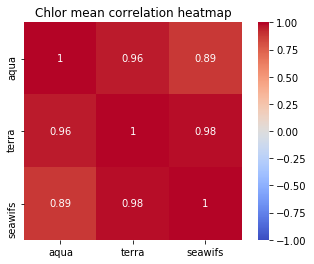

In [31]:
sns.heatmap(
    rec_sat_means.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    annot=True,
).set_title('Chlor mean correlation heatmap')

In [32]:
rec_sat_stds

,aqua,terra,seawifs
2003,7.434051,9.578983,3.748371
2004,11.009650,12.110327,4.034787
2005,11.241541,12.142870,4.570190
2006,10.807912,11.407844,3.717233


Text(0.5, 1, 'Chlor std correlation heatmap')

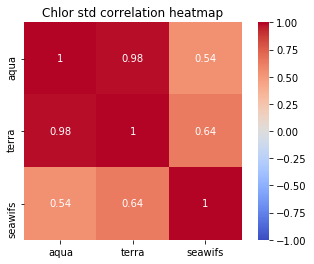

In [33]:
sns.heatmap(
    rec_sat_stds.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    annot=True,
).set_title('Chlor std correlation heatmap')

In [34]:
rec_sat_mins

,aqua,terra,seawifs
2003,0.0,0.0,0.0
2004,0.0,0.0,0.0
2005,0.0,0.0,0.0
2006,0.0,0.0,0.0


In [35]:
rec_sat_maxs

,aqua,terra,seawifs
2003,256.232136,398.263873,225.219110
2004,493.696432,408.225346,212.241857
2005,437.310578,434.716926,280.913220
2006,373.930291,343.014344,201.960636


Text(0.5, 1, 'Chlor max correlation heatmap')

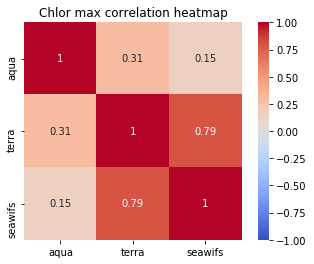

In [36]:
sns.heatmap(
    rec_sat_maxs.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap='coolwarm',
    square=True,
    annot=True,
).set_title('Chlor max correlation heatmap')

Chlorophyll means for satelite/year


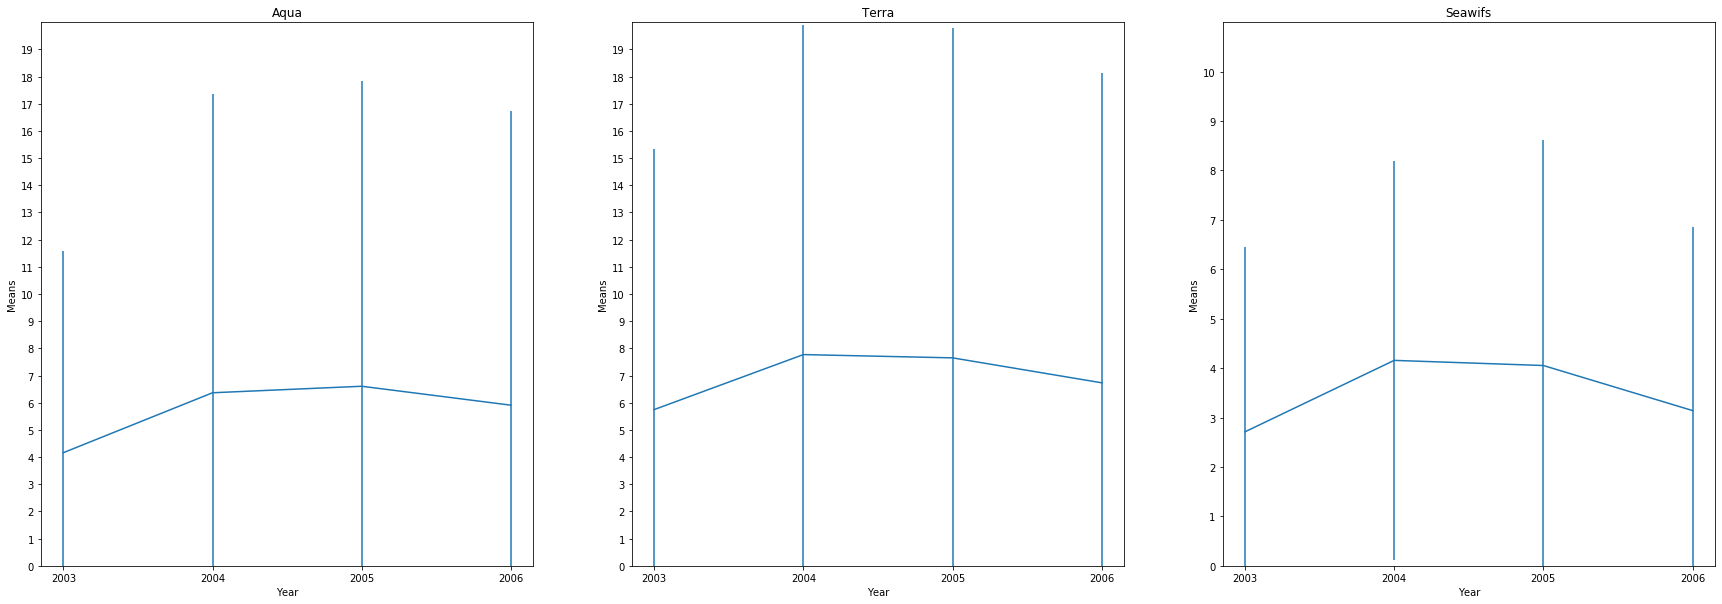

In [25]:
fig = plt.figure(figsize=(30, 10))
ax_lst = fig.subplots(1, 3)

ax_lst[0].errorbar(years, rec_sat_means['aqua'], yerr=rec_sat_stds['aqua'])
ax_lst[0].set_xlabel('Year')
ax_lst[0].set_xticks(years)
ax_lst[0].set_yticks(list(range(0, 20)))
ax_lst[0].set_ylim([0, 20])
ax_lst[0].set_ylabel('Means')
ax_lst[0].set_title('Aqua')

ax_lst[1].errorbar(years, rec_sat_means['terra'], yerr=rec_sat_stds['terra'])
ax_lst[1].set_xlabel('Year')
ax_lst[1].set_xticks(years)
ax_lst[1].set_yticks(list(range(0, 20)))
ax_lst[1].set_ylim([0, 20])
ax_lst[1].set_ylabel('Means')
ax_lst[1].set_title('Terra')

ax_lst[2].errorbar(years, rec_sat_means['seawifs'], yerr=rec_sat_stds['seawifs'])
ax_lst[2].set_xlabel('Year')
ax_lst[2].set_xticks(years)
ax_lst[2].set_yticks(list(range(0, 11)))
ax_lst[2].set_ylim([0, 11])
ax_lst[2].set_ylabel('Means')
ax_lst[2].set_title('Seawifs')

print('Chlorophyll means for satelite/year')

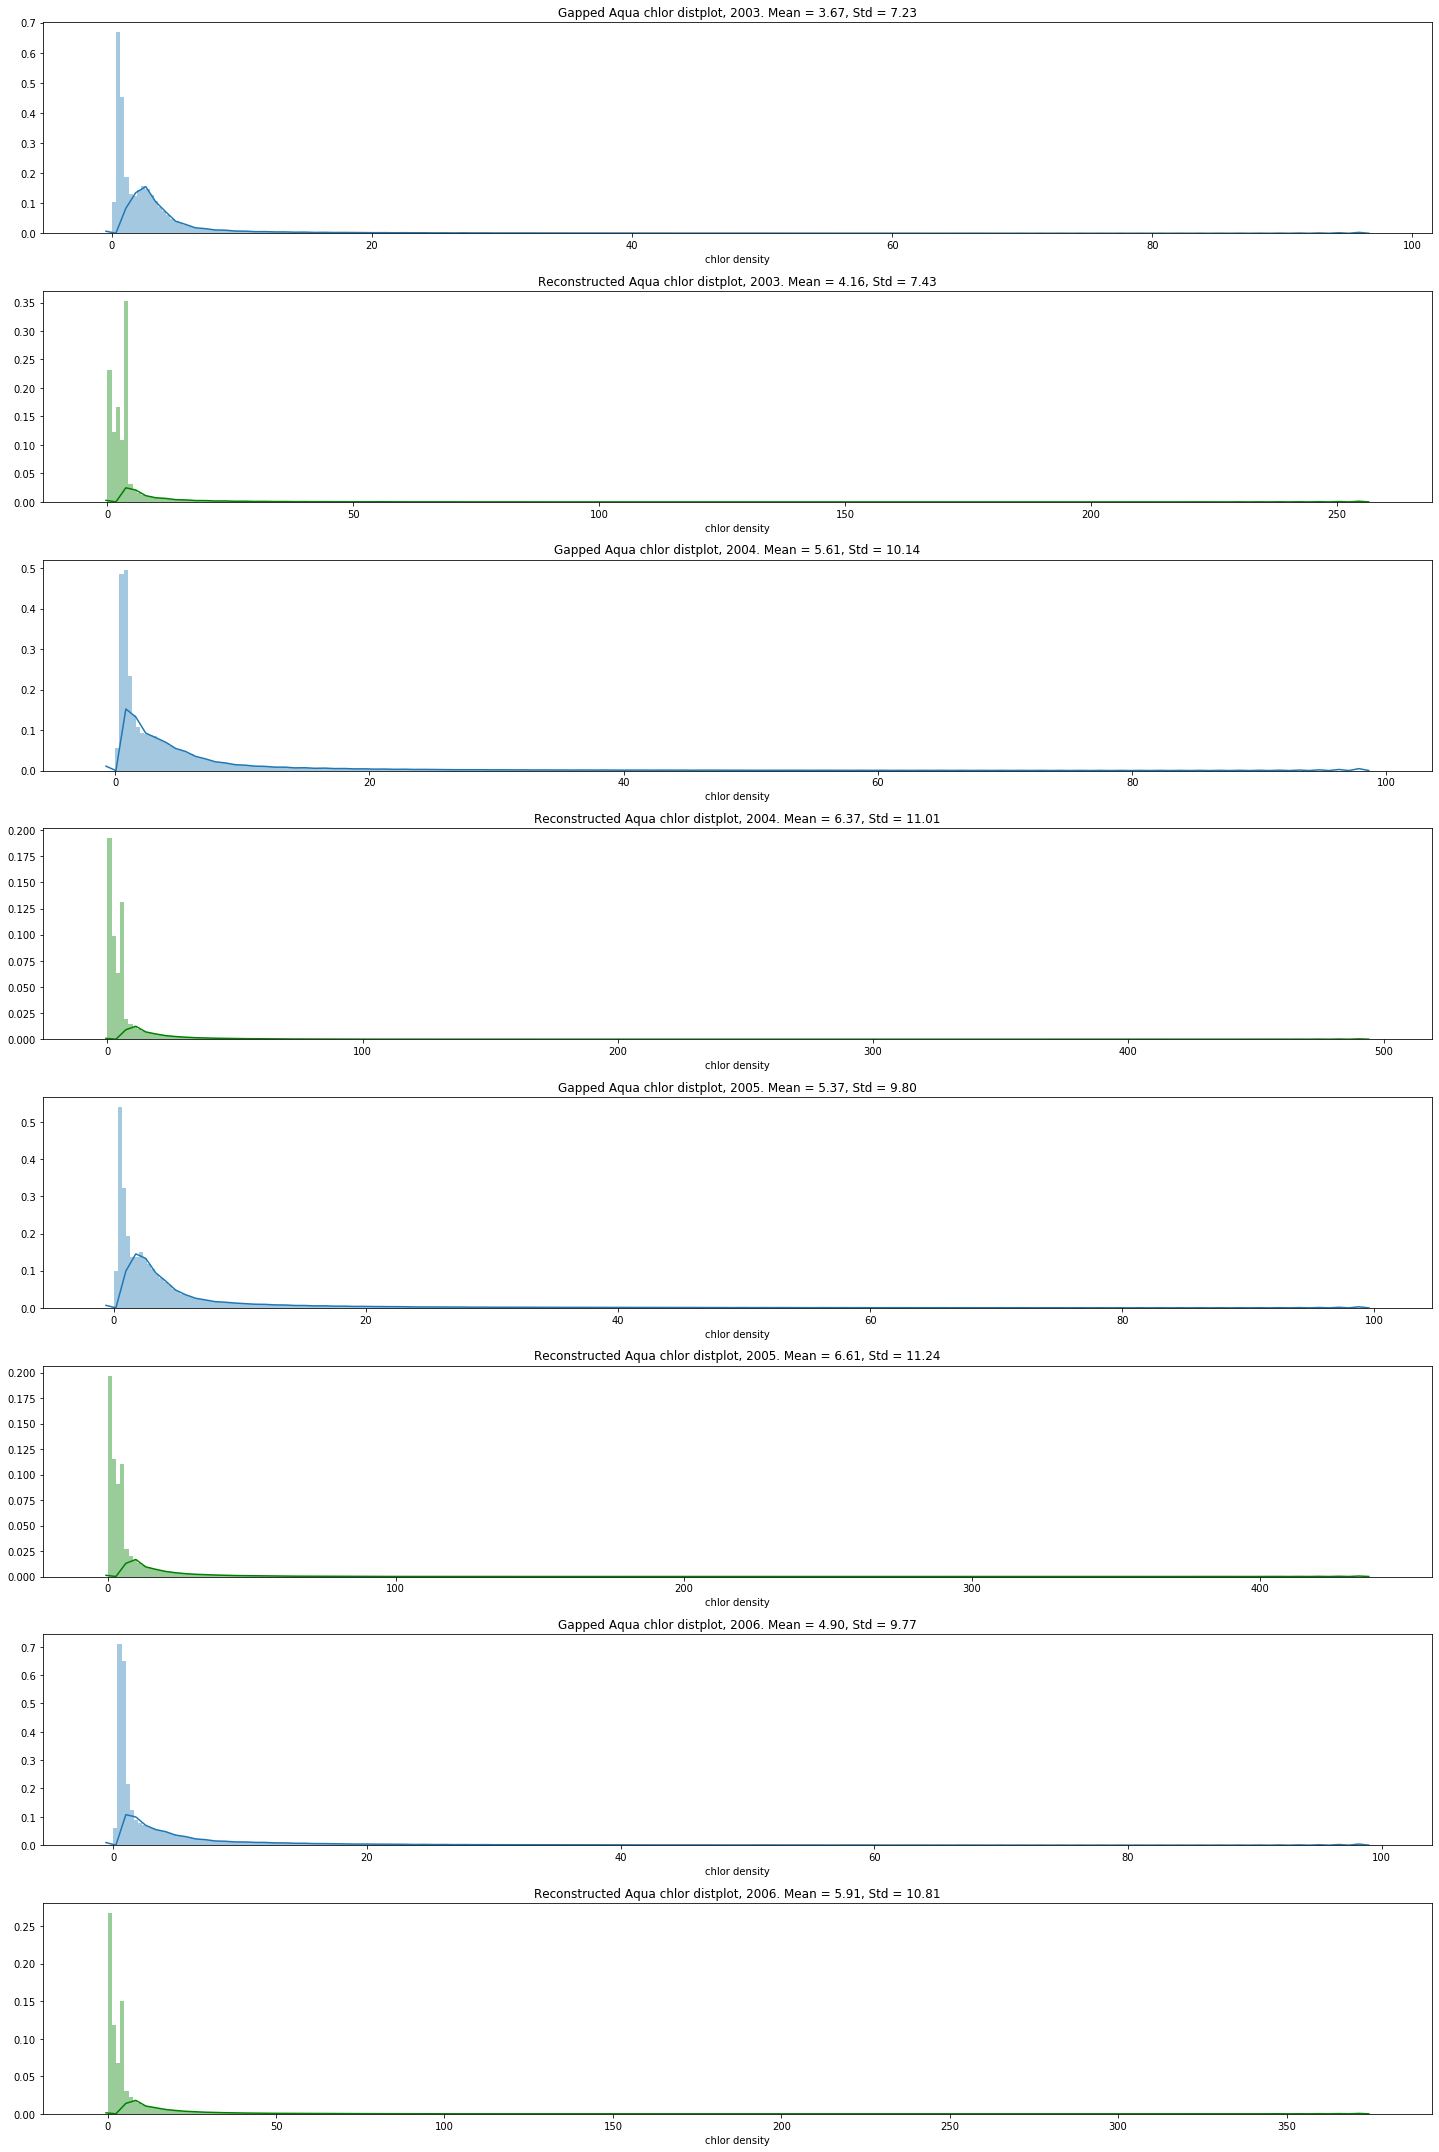

In [37]:
fig = plt.figure(figsize=(20, 30))
ax_lst = fig.subplots(8)
bins_amount = 300

for i, year in enumerate(years):
    gap_ax = ax_lst[2*i]
    gap_data = gap_sat_ts['aqua'][year]['data'][~np.isnan(gap_sat_ts['aqua'][year]['data'])]
    gap_p = sns.distplot(gap_data, ax=gap_ax, bins=bins_amount)
    gap_p.set_title(f'Gapped Aqua chlor distplot, {year}. Mean = {gap_data.mean():.02f}, Std = {gap_data.std():.02f}')
    gap_p.set_xlabel('chlor density')
    
    rec_ax = ax_lst[2*i + 1]
    rec_data = rec_sat_ts['aqua'][year]['data'][~np.isnan(rec_sat_ts['aqua'][year]['data'])]
    rec_p = sns.distplot(rec_data, ax=rec_ax, bins=bins_amount, color='g')
    rec_p.set_title(f'Reconstructed Aqua chlor distplot, {year}. Mean = {rec_data.mean():.02f}, Std = {rec_data.std():.02f}')
    rec_p.set_xlabel('chlor density')
    
fig.tight_layout()

In [71]:
lats[mask]

array([55.7956616 , 55.7956616 , 55.78661663, ..., 51.46311983,
       51.46311983, 51.46311983])

In [73]:
rec_sat_detailed = pd.DataFrame({
    'aqua': factor_rec_tensor(rec_sat_ts['aqua']),
    'terra': factor_rec_tensor(rec_sat_ts['terra']),
    'seawifs': factor_rec_tensor(rec_sat_ts['seawifs']),
    'lon': np.repeat(lons[mask][np.newaxis, :], len(days) * len(years), axis=0).flatten(),
    'lat': np.repeat(lats[mask][np.newaxis, :], len(days) * len(years), axis=0).flatten(),
    'day': np.repeat(np.repeat(days[:, np.newaxis], mask.sum(), axis=1).flatten(), len(years)),
    'year': np.repeat(years[:, np.newaxis], mask.sum() * len(days), axis=1).flatten()
})
rec_sat_detailed.head(20)

,aqua,terra,seawifs,lon,lat,day,year
0,3.665026,4.940447,2.306952,109.617605,55.795662,151,2003
1,15.978685,4.940447,3.045020,109.633036,55.795662,151,2003
2,3.350842,4.940447,2.157275,109.617605,55.786617,151,2003
3,20.797145,0.000000,3.091553,109.633036,55.786617,151,2003
4,14.755336,6.208282,0.000000,109.679330,55.786617,151,2003
5,11.424398,14.114436,5.962300,109.694761,55.786617,151,2003
6,3.665026,4.940447,2.306952,109.571311,55.777572,151,2003
7,3.665026,4.940447,2.306952,109.586743,55.777572,151,2003
8,3.665026,4.940447,2.306952,109.602174,55.777572,151,2003
9,3.665026,4.940447,2.306952,109.617605,55.777572,151,2003


## Flattened chlorophyll correlations

In [93]:
rec_sat_detailed[(rec_sat_detailed['year'] == '2003')][['aqua', 'terra', 'seawifs']].corr()

,aqua,terra,seawifs
aqua,1.000000,0.319471,0.191169
terra,0.319471,1.000000,0.175737
seawifs,0.191169,0.175737,1.000000


In [94]:
rec_sat_detailed[(rec_sat_detailed['year'] == '2004')][['aqua', 'terra', 'seawifs']].corr()

,aqua,terra,seawifs
aqua,1.000000,0.406843,0.082717
terra,0.406843,1.000000,0.105547
seawifs,0.082717,0.105547,1.000000


In [95]:
rec_sat_detailed[(rec_sat_detailed['year'] == '2005')][['aqua', 'terra', 'seawifs']].corr()

,aqua,terra,seawifs
aqua,1.000000,0.392427,0.112869
terra,0.392427,1.000000,0.116094
seawifs,0.112869,0.116094,1.000000


In [96]:
rec_sat_detailed[(rec_sat_detailed['year'] == '2006')][['aqua', 'terra', 'seawifs']].corr()

,aqua,terra,seawifs
aqua,1.000000,0.374569,0.114434
terra,0.374569,1.000000,0.084249
seawifs,0.114434,0.084249,1.000000
